In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import flowkit as fk

"""WARNING: disabling future warnings"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

SAMPLE		FCS FILE (F2HS#8)	

```
Lenti-Dox-		    M3LM083021_8_5.fcs
Lenti+Dox- (FH4a)	M3LM083021_7_8.fcs
Lenti+Dox- (FH4b)	M3LM083021_9_9.fcs
FH4a #1		 	 	M3LM083021_10_10.fcs	
FH4a #2			 	M3LM083021_11_12.fcs
FH4a #3 hi		 	M3LM083021_12_14.fcs
FH4a #4 hi		 	M3LM083021_13_11.fcsS
# FH4b #1			 	M3LM083021_14_13.fcs
# FH4b #2			 	M3LM083021_15_15.fcs
# FH4b #3 hi		 	M3LM083021_16_16.fcs
# FH4b #4 hi		 	M3LM083021_17_17.fcs
```

In [27]:
data = {
    "Lenti-Dox-" : 'M3LM083021_8_5.fcs',
    "Lenti+Dox-" : 'M3LM083021_7_8.fcs',
    "FH4a_low_1" : 'M3LM083021_10_10.fcs',
    "FH4a_low_2" : 'M3LM083021_11_12.fcs',
    "FH4a_hi_1"  : 'M3LM083021_12_14.fcs',
    "FH4a_hi_2"  : 'M3LM083021_13_11.fcs',
}
data

{'Lenti-Dox-': 'M3LM083021_8_5.fcs',
 'Lenti+Dox-': 'M3LM083021_7_8.fcs',
 'FH4a_low_1': 'M3LM083021_10_10.fcs',
 'FH4a_low_2': 'M3LM083021_11_12.fcs',
 'FH4a_hi_1': 'M3LM083021_12_14.fcs',
 'FH4a_hi_2': 'M3LM083021_13_11.fcs'}

In [12]:
dpath = "/nfs/turbo/umms-indikar/shared/projects/HSC/data/flow_cytometry/F2HS_8/"

df_list = []

for f in os.listdir(dpath):
    if f.endswith(".fcs"):
        label = f.replace(".fcs", "").replace(" ", "")
        print(label)
        fpath = f"{dpath}{f}"
        sample = fk.Sample(fpath, ignore_offset_error=True)
        df = sample.as_dataframe(source='raw')
        df['sample'] = label
        df_list.append(df)
        # break

df = pd.concat(df_list)
print(f"{df.shape=}")
df.head()

M3LM083021_3_CD34AF488
M3LM083021_5_FULLSTAIN
M3LM083021_7_8
M3LM083021_9_9
M3LM083021_15_15
M3LM083021_8_5
M3LM083021_14_13
M3LM083021_11_12
M3LM083021_2_CD34AF488
M3LM083021_10_10
M3LM083021_17_17
M3LM083021_1_
M3LM083021_16_16
M3LM083021_6_UNSTAINEDA
M3LM083021_12_14
M3LM083021_13_11
M3LM083021_4_DAPI
df.shape=(592601, 21)


pnn,TIME,TIME2,FL2-Height,FL2-Area,FL2-Width,FSC1-Height,FSC1-Area,FSC1-Width,SSC2-Height,SSC2-Area,...,FL10-Height,FL10-Area,FL10-Width,FL24-Height,FL24-Area,FL24-Width,sample,FL36-Height,FL36-Area,FL36-Width
pns,Time LSW,Time MSW,DAPI 405-448/59,DAPI 405-448/59,DAPI 405-448/59,488-FSC1,488-FSC1,488-FSC1,488-SSC,488-SSC,...,AF488 488-513/26,AF488 488-513/26,AF488 488-513/26,PE 561-579/16,PE 561-579/16,PE 561-579/16,,APC 640-671/30,APC 640-671/30,APC 640-671/30
0,0.000267,0.0,747470.0,1.237916e+06,1.132462e+09,1.145508e+09,3.378569e+09,1.795162e+09,9.497103e+08,1.979568e+09,...,244506.0,3.513422e+05,8.640266e+08,85877684.0,1.604709e+08,6.123684e+08,M3LM083021_3_CD34AF488,NaN,NaN,NaN
1,0.000455,0.0,14110.0,2.448438e+03,0.000000e+00,5.915216e+07,8.329393e+07,7.801405e+08,1.764792e+07,2.067241e+07,...,43546.0,2.378750e+04,0.000000e+00,205488.0,1.907000e+05,9.311355e+08,M3LM083021_3_CD34AF488,NaN,NaN,NaN
2,0.000745,0.0,536824.0,1.047917e+06,1.107296e+09,1.587969e+09,3.367604e+09,6.291456e+08,1.346898e+09,2.552634e+09,...,280302.0,5.070219e+05,9.646899e+08,163280262.0,3.814367e+08,7.885292e+08,M3LM083021_3_CD34AF488,NaN,NaN,NaN
3,0.000748,0.0,12777928.0,2.709109e+07,7.969178e+08,5.343371e+08,1.927285e+09,1.207960e+09,2.619315e+09,6.710887e+09,...,3995090.0,8.374633e+06,6.794772e+08,339361548.0,1.263252e+09,1.333789e+09,M3LM083021_3_CD34AF488,NaN,NaN,NaN
4,0.000993,0.0,843020.0,1.188105e+06,5.033165e+08,1.223681e+09,3.158510e+09,8.304722e+08,1.246928e+09,2.383273e+09,...,404722.0,6.307328e+05,1.249903e+09,195280966.0,4.576359e+08,7.801405e+08,M3LM083021_3_CD34AF488,NaN,NaN,NaN


In [22]:
def plot_flow_scatter(df, x, y, ax=None, 
                      scatter_kws=False,
                      hist_kws=False,
                      kde_kws=False):
    """A function to plot flow results as a scatterplot """
    if ax is None:
        _, ax = plt.subplots()

    if not scatter_kws is None:
        sns.scatterplot(data=df, 
                        x=x,
                        y=y,
                        ax=ax,
                        **scatter_kws,
               )
    if not hist_kws is None:
        sns.histplot(data=df, 
                     x=x,
                     y=y,
                     ax=ax,
                     **hist_kws,
                )
    if not kde_kws is None:
        sns.kdeplot(data=df, 
                    x=x,
                    y=y, 
                    ax=ax,
                    **kde_kws,
           )

    return ax

In [19]:
df.columns

MultiIndex([(       'TIME',          'Time LSW'),
            (      'TIME2',          'Time MSW'),
            ( 'FL2-Height',  'DAPI  405-448/59'),
            (   'FL2-Area',  'DAPI  405-448/59'),
            (  'FL2-Width',  'DAPI  405-448/59'),
            ('FSC1-Height',          '488-FSC1'),
            (  'FSC1-Area',          '488-FSC1'),
            ( 'FSC1-Width',          '488-FSC1'),
            ('SSC2-Height',           '488-SSC'),
            (  'SSC2-Area',           '488-SSC'),
            ( 'SSC2-Width',           '488-SSC'),
            ('FL10-Height', 'AF488  488-513/26'),
            (  'FL10-Area', 'AF488  488-513/26'),
            ( 'FL10-Width', 'AF488  488-513/26'),
            ('FL24-Height',    'PE  561-579/16'),
            (  'FL24-Area',    'PE  561-579/16'),
            ( 'FL24-Width',    'PE  561-579/16'),
            (     'sample',                  ''),
            ('FL36-Height',   'APC  640-671/30'),
            (  'FL36-Area',   'APC  640-671/30'),


M3LM083021_10_10


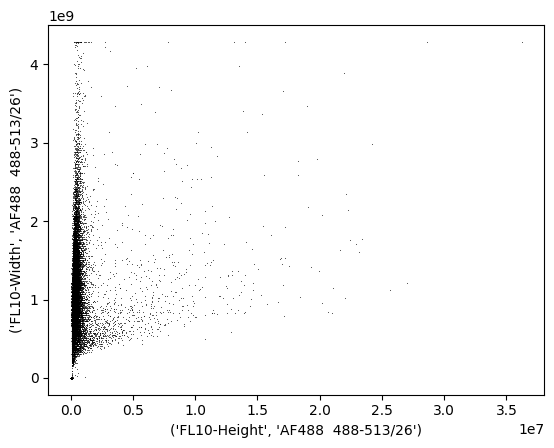

In [25]:
scatter_kws = {
    's' : 0.5, 
    'color' : 'k', 
    'alpha' : 0.75, 
    'ec':'k', 
    'zorder' : 3
}

hist_kws = {
    'bins' : 50, 
    'log_scale' : True,
    'alpha' : 0.75, 
    'cmap' : 'hot_r',
    'zorder' : 2
}

kde_kws = {
    'levels' : 5,
    'log_scale' : True,
    'color' : 'k',
    'linewidths' : 0.5,
    'zorder' : 4,
}

x = ('FL10-Height', 'AF488  488-513/26')
y = ('FL10-Width', 'AF488  488-513/26')

for sample, group in df.groupby('sample'):
    print(sample)
    plot_flow_scatter(group, x, y, 
                      scatter_kws=scatter_kws,
                      hist_kws=None,
                      kde_kws=None,)
    break 